recognize based on div id="cpt style=display:block
(other way div id="cpt style=display:none)
1. take picture from id="cpt_cd", below is 'img', take 'src'
2. teseract picture 
3. write txt into id="f15" name="cpt_t"
4. send with: cpt_a()
    
    cpt_t=document.getElementsByName('cpt_t')

    var b = cpt_t[0].value.toLowerCase();
    
    a.open('GET', '//stooq.com/q/l/s/?t=' + b, true);
    
    a.setRequestHeader('Content-type', 'application/x-www-form-urlencoded');
    
    a.send(null);
5. refresh page with: cpt_g(0,0,1)


In [48]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract as tes
import cv2
import imutils
import numpy as np
from bs4 import BeautifulSoup as bs
import time
import requests as rq
from PIL import Image
import io

In [7]:
with open('Stooq_with_captcha.html') as f:
    cpt = bs(f,'html.parser')
with open('Stooq_without_captcha.html') as f:
    cptNo = bs(f,'html.parser')

In [39]:
cpt_style = cptNo.find('div',id='cpt')['style']
style_dic= {s.split(':')[0].strip():s.split(':')[1].strip() 
            for s in cpt_style.split(';') 
            if ':' in s}
style_dic['display']


'display:none;z-index:101;width:240px'

In [37]:
cpt_style = cpt.find('div',id='cpt')['style']
style_dic= {s.split(':')[0].strip():s.split(':')[1].strip() 
            for s in cpt_style.split(';') 
            if ':' in s}
style_dic['display']

'block'

In [67]:
url = f'https://stooq.com/q/l/s/i/?{int(time.time()*1000)}'
resp = rq.get(url=url)


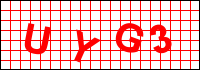

In [68]:
Image.open(io.BytesIO(resp.content))

In [69]:
cpt_txt=input().lower()

In [70]:
url = f'https://stooq.com/q/l/s/?t={cpt_txt}'
resp= rq.get(url=url, headers={'Content-type':'application/x-www-form-urlencoded'})

In [71]:
resp.content

b'2'

In [45]:


def cv2show(img):
    cv2.imwrite( 'test.png', img)
    return(Image.open('test.png'))
    

In [111]:
img_orig=cv2.imread('stooq.png')
img=cv2.cvtColor(img_orig,cv2.COLOR_BGR2GRAY)
img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]


hori_ker=cv2.getStructuringElement(cv2.MORPH_RECT,(20,1))
vert_ker=cv2.getStructuringElement(cv2.MORPH_RECT,(1,20))
hor_lines= cv2.morphologyEx(img,cv2.MORPH_GRADIENT,hori_ker, iterations=2)
ver_lines= cv2.morphologyEx(img,cv2.MORPH_GRADIENT,vert_ker, iterations=2)
hor_lines=cv2.bitwise_not(hor_lines)
ver_lines=cv2.bitwise_not(ver_lines)



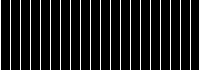

In [112]:
cv2show(ver_lines)

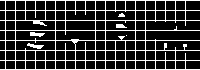

In [101]:
cv2show(hor_lines)

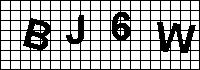

In [82]:
cv2show(img)

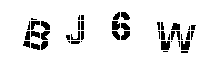

In [113]:
img_wolines=cv2.bitwise_or(img,hor_lines)
img_wolines=cv2.bitwise_or(img_wolines,ver_lines)
cv2show(img_wolines)

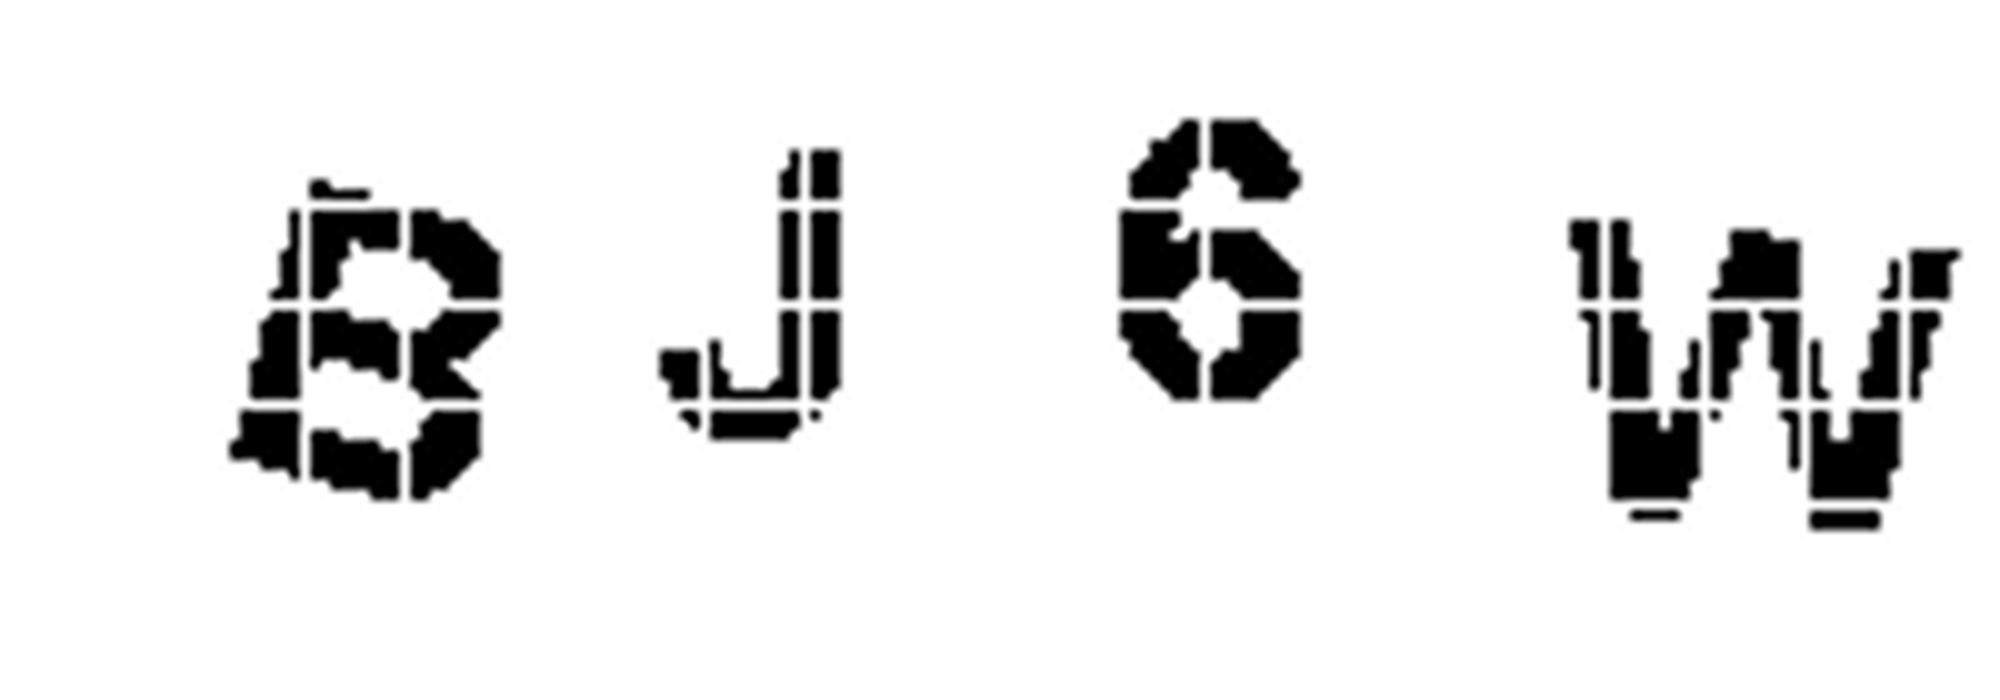

In [114]:
img_ech=cv2.resize(img_wolines,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
mex_kernel = np.array([[0,0,-1,0,0],
                        [0,-1,-2,-1,0],
                        [-1,-2,16,-2,1],
                        [0,-1,-2,-1,0],
                        [0,0,-1,0,0]])
shrp_kernel = np.array([[-1, -1, -1],
                         [-1, 9, -1], 
                         [-1, -1, -1]])
#img=cv2.filter2D(img,-1,shrp_kernel)
img_ech = cv2.GaussianBlur(img_ech,(3,3),0)
#img_ech=cv2.threshold(img_ech,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
cv2show(img_ech)

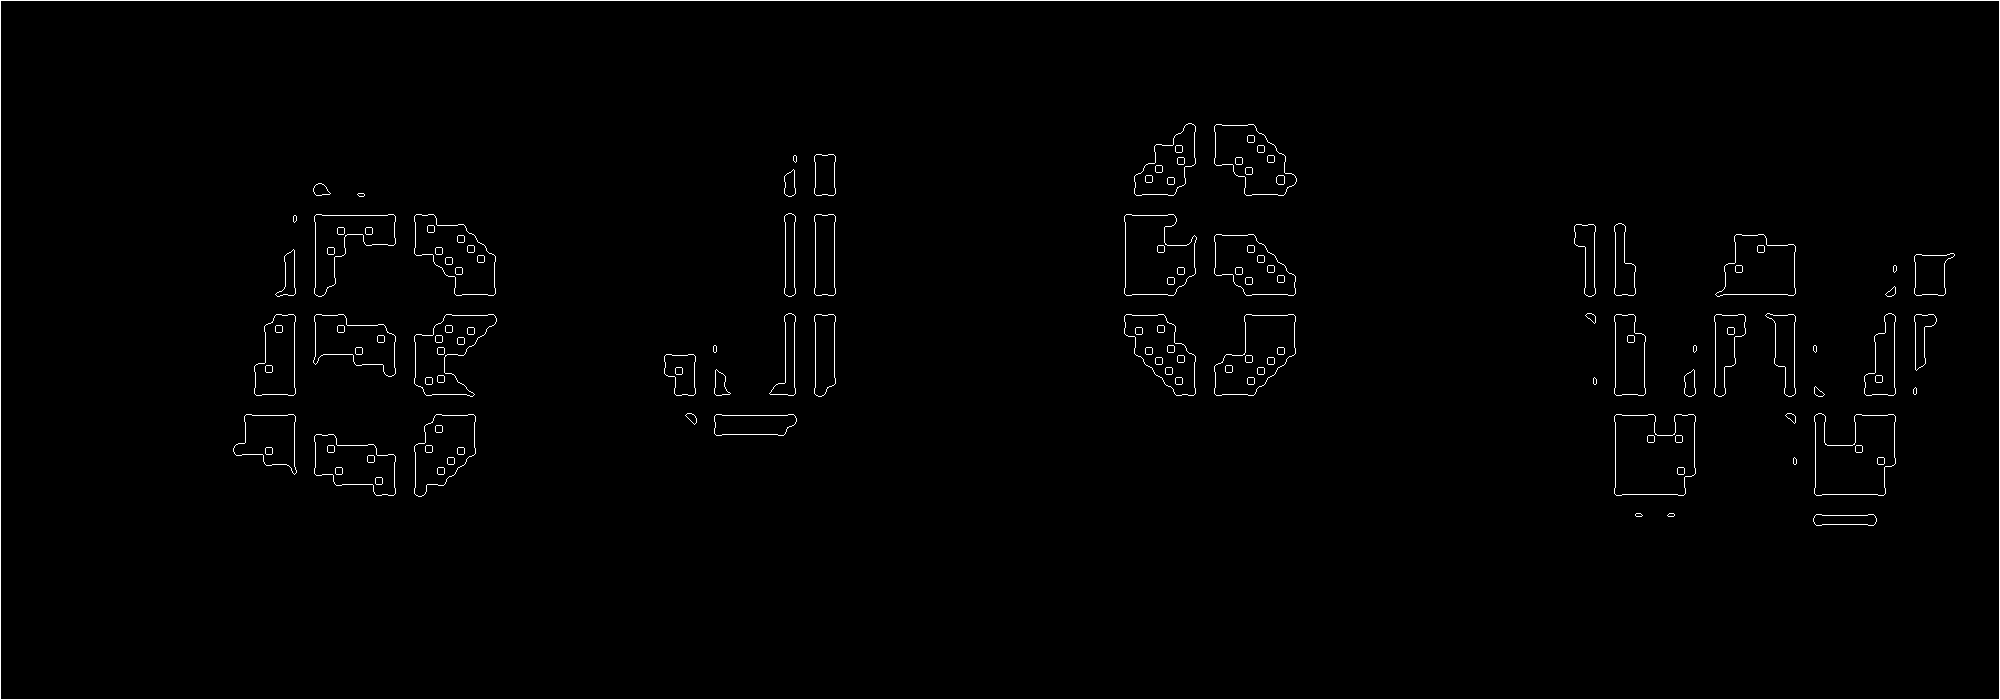

In [115]:
cnts,h=cv2.findContours(img_ech,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
img_cnt=cv2.drawContours(img_ech*0,cnts,-1,(255,255,255),1)
cv2show(img_cnt)

In [47]:
cv2show(img_orig)

In [45]:
cv2.imwrite('stooq_final.png',cv2.bitwise_xor(result,img_cnt))

True

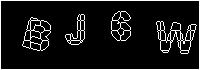

In [20]:
imge=Image.open('stooq_trans.png')
imge

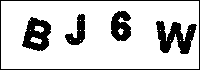

In [46]:
imge=Image.open('stooq_final.png')
imge

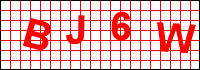

In [49]:
imge=Image.open('stooq.png')
imge

In [40]:
tes.image_to_string(imge)

' \n\n \n\n \n\n \n\n \n\x0c'